In [1]:
import numpy as np
import scipy.io as sio
import tensorflow.keras as keras
from matplotlib import pyplot as plt

In [2]:
import keras.layers as layers

In [3]:
mat_contents=sio.loadmat('P300_py.mat')

In [6]:
xTrain=mat_contents['Xtrain']
yTrain=mat_contents['ytrain']
xTest=mat_contents['Xtest']
yTest=mat_contents['ytest']
xTrain.shape
print("xTrain shape = ", xTrain.shape)
print("xTest shape = ", xTest.shape)
print("yTrain shape = ", yTrain.shape)
print("yTest shape = ", yTest.shape)
yTrain[0:9,:]

xTrain shape =  (1058, 64, 128)
xTest shape =  (530, 64, 128)
yTrain shape =  (1058, 2)
yTest shape =  (530, 2)


array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0]], dtype=uint8)

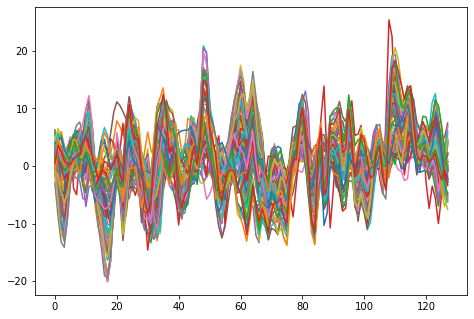

In [8]:
sampleEEG=xTrain[6,:,:].T
figure = plt.figure()
ax = figure.add_axes([0,0,1,1])
ax.plot(sampleEEG)

In [16]:
input_shape=(64,128,1)
num_classes=2
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(3, kernel_size=(64, 10), activation="relu"),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


#model = keras.Sequential(
#    [
#        keras.Input(shape=input_shape),
#        layers.Flatten(),
#        layers.Dense(num_classes, activation="softmax"),
#    ]
#)

#model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 1, 119, 3)         1923      
                                                                 
 flatten_5 (Flatten)         (None, 357)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 716       
                                                                 
Total params: 2,639
Trainable params: 2,639
Non-trainable params: 0
_________________________________________________________________


In [17]:
batch_size = 128
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(xTrain, yTrain, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(xTest, yTest, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/10
8/8 [==============================] - 1s 36ms/step - loss: 2.4749 - accuracy: 0.4611 - val_loss: 0.8666 - val_accuracy: 0.7264
Epoch 2/10
8/8 [==============================] - 0s 20ms/step - loss: 0.7480 - accuracy: 0.8046 - val_loss: 0.6849 - val_accuracy: 0.8302
Epoch 3/10
8/8 [==============================] - 0s 20ms/step - loss: 0.6903 - accuracy: 0.8277 - val_loss: 0.6208 - val_accuracy: 0.8396
Epoch 4/10
8/8 [==============================] - 0s 19ms/step - loss: 0.5465 - accuracy: 0.8456 - val_loss: 0.5167 - val_accuracy: 0.8302
Epoch 5/10
8/8 [==============================] - 0s 20ms/step - loss: 0.4306 - accuracy: 0.8319 - val_loss: 0.4776 - val_accuracy: 0.8019
Epoch 6/10
8/8 [==============================] - 0s 20ms/step - loss: 0.3846 - accuracy: 0.8298 - val_loss: 0.4571 - val_accuracy: 0.8113
Epoch 7/10
8/8 [==============================] - 0s 21ms/step - loss: 0.3522 - accuracy: 0.8466 - val_loss: 0.4839 - val_accuracy: 0.8113
Epoch 8/10
8/8 [===========